In [4]:
import pandas as pd
df= pd.read_csv("churn_set.csv")
df.head(3)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.shape


(7043, 21)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette('husl')

In [6]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())
print(f'\nTotal missing values: {df.isnull().sum().sum()}')

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Total missing values: 0


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.5%


C:\Users\Yash_Deshmukh\AppData\Local\Temp\ipykernel_3264\2087756788.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'\nChurn Rate: {churn_counts[1]/len(df)*100:.1f}%')


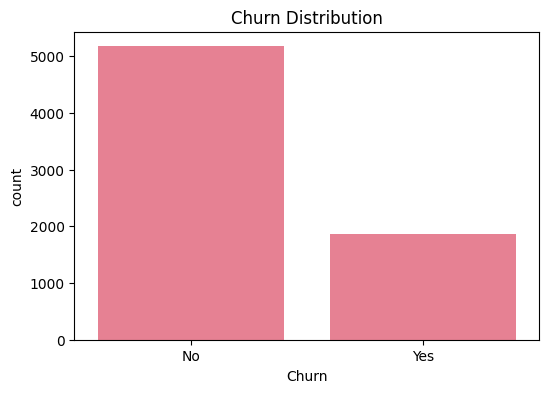

In [7]:
# Churn distribution
churn_counts = df['Churn'].value_counts()
print('Churn Distribution:')
print(churn_counts)
print(f'\nChurn Rate: {churn_counts[1]/len(df)*100:.1f}%')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [10]:
# Analyze numerical vs categorical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f'Numerical columns ({len(numerical_cols)}): {numerical_cols}')
print(f'\nCategorical columns ({len(categorical_cols)}): {categorical_cols}')

Numerical columns (3): ['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical columns (18): ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


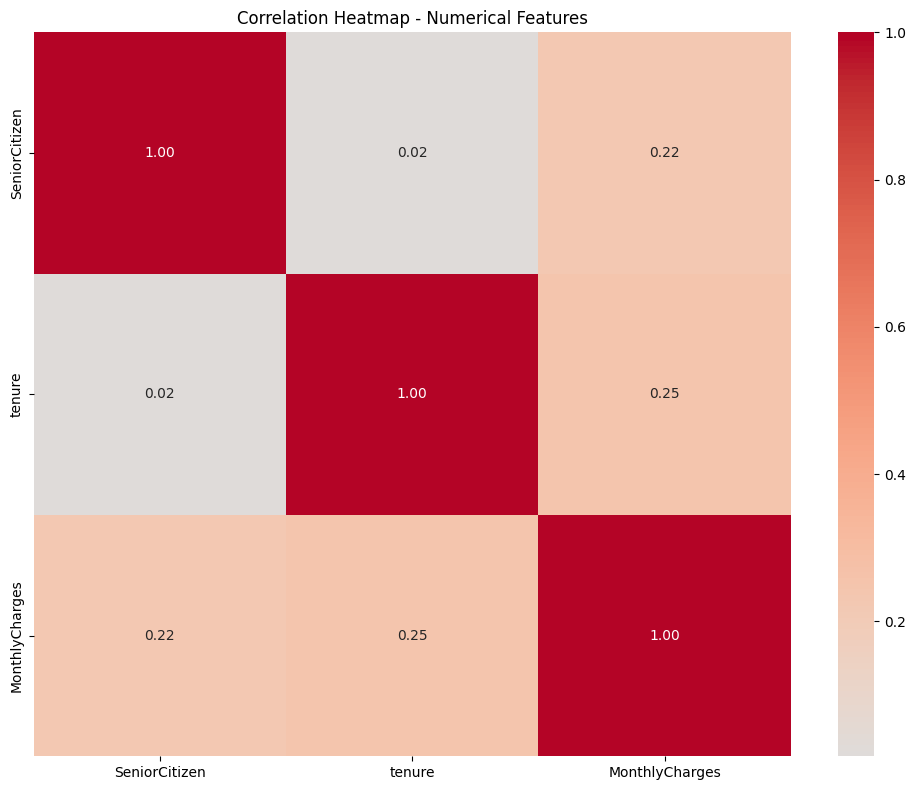

In [9]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap - Numerical Features')
plt.tight_layout()
plt.show()

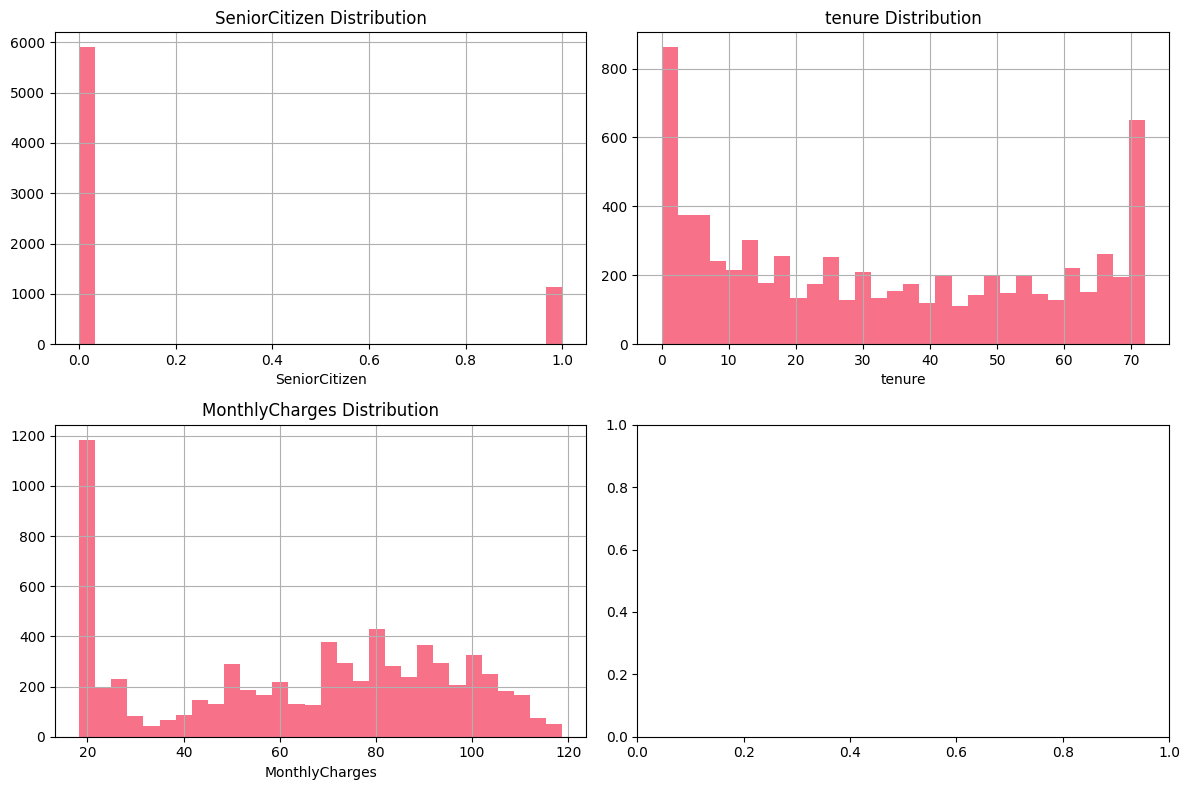

In [11]:
# Univariate plots - Histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:4]):
    df[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

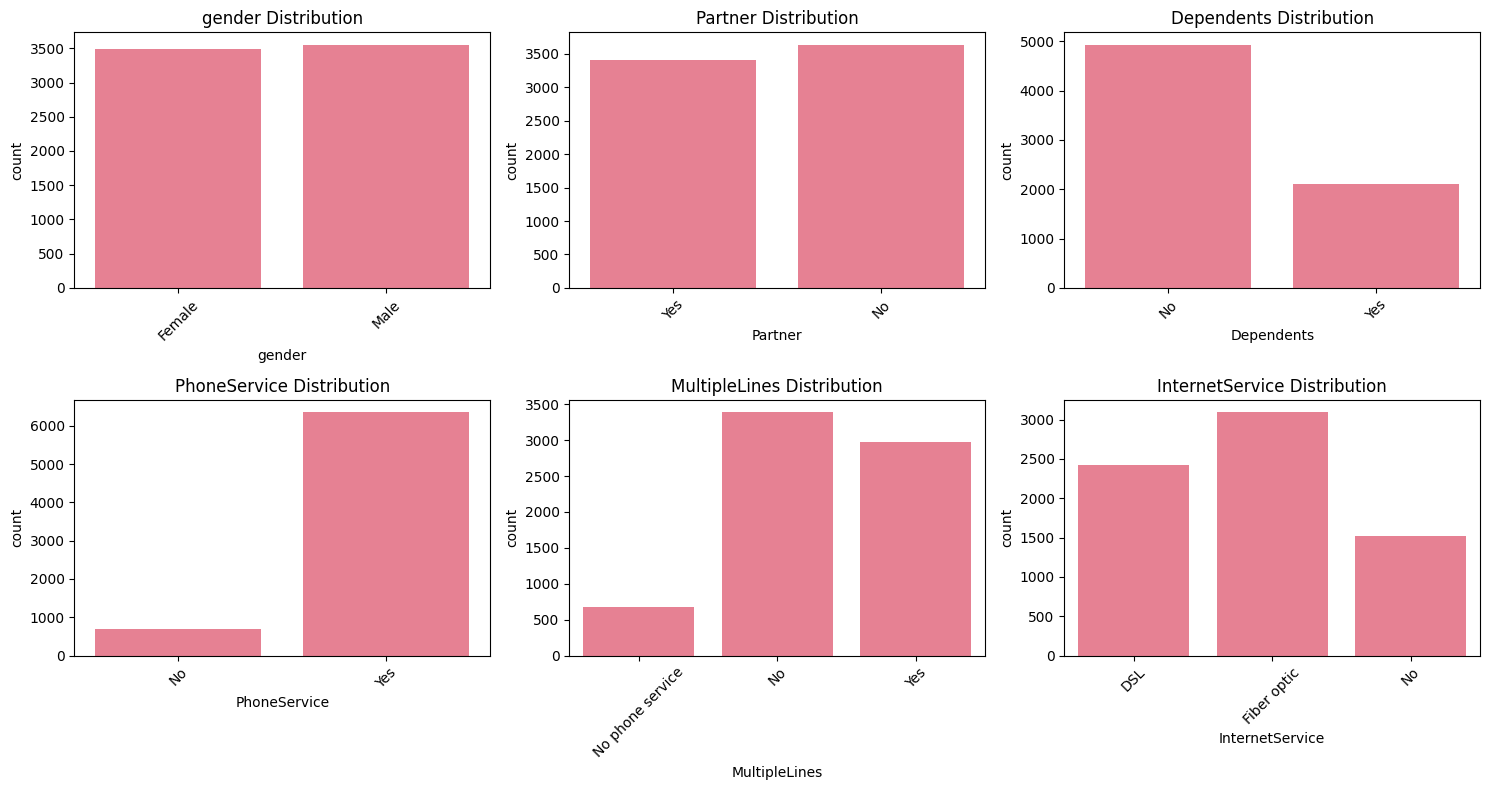

In [12]:
# Univariate plots - Count plots for categorical variables
categorical_subset = [col for col in categorical_cols if col != 'customerID'][:6]

fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.ravel()

for i, col in enumerate(categorical_subset):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

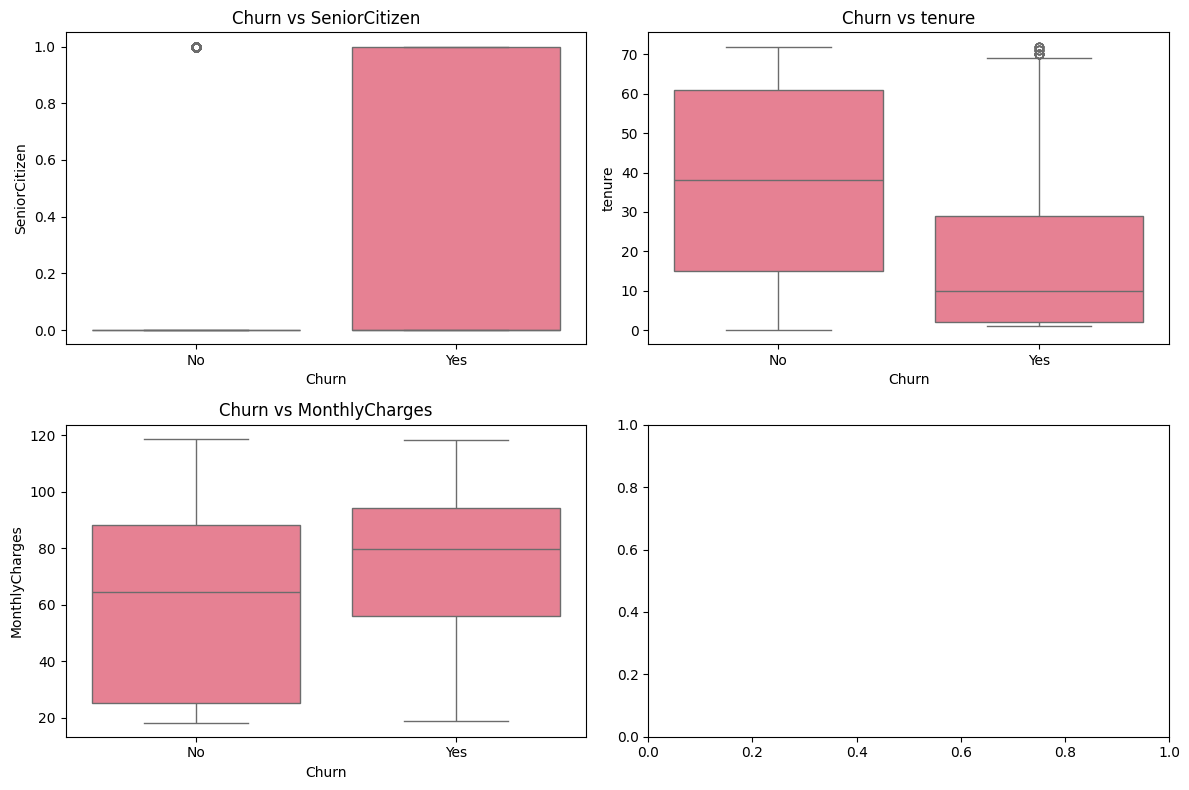

In [13]:
# Bivariate plots - Churn vs numerical features
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:4]):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'Churn vs {col}')

plt.tight_layout()
plt.show()

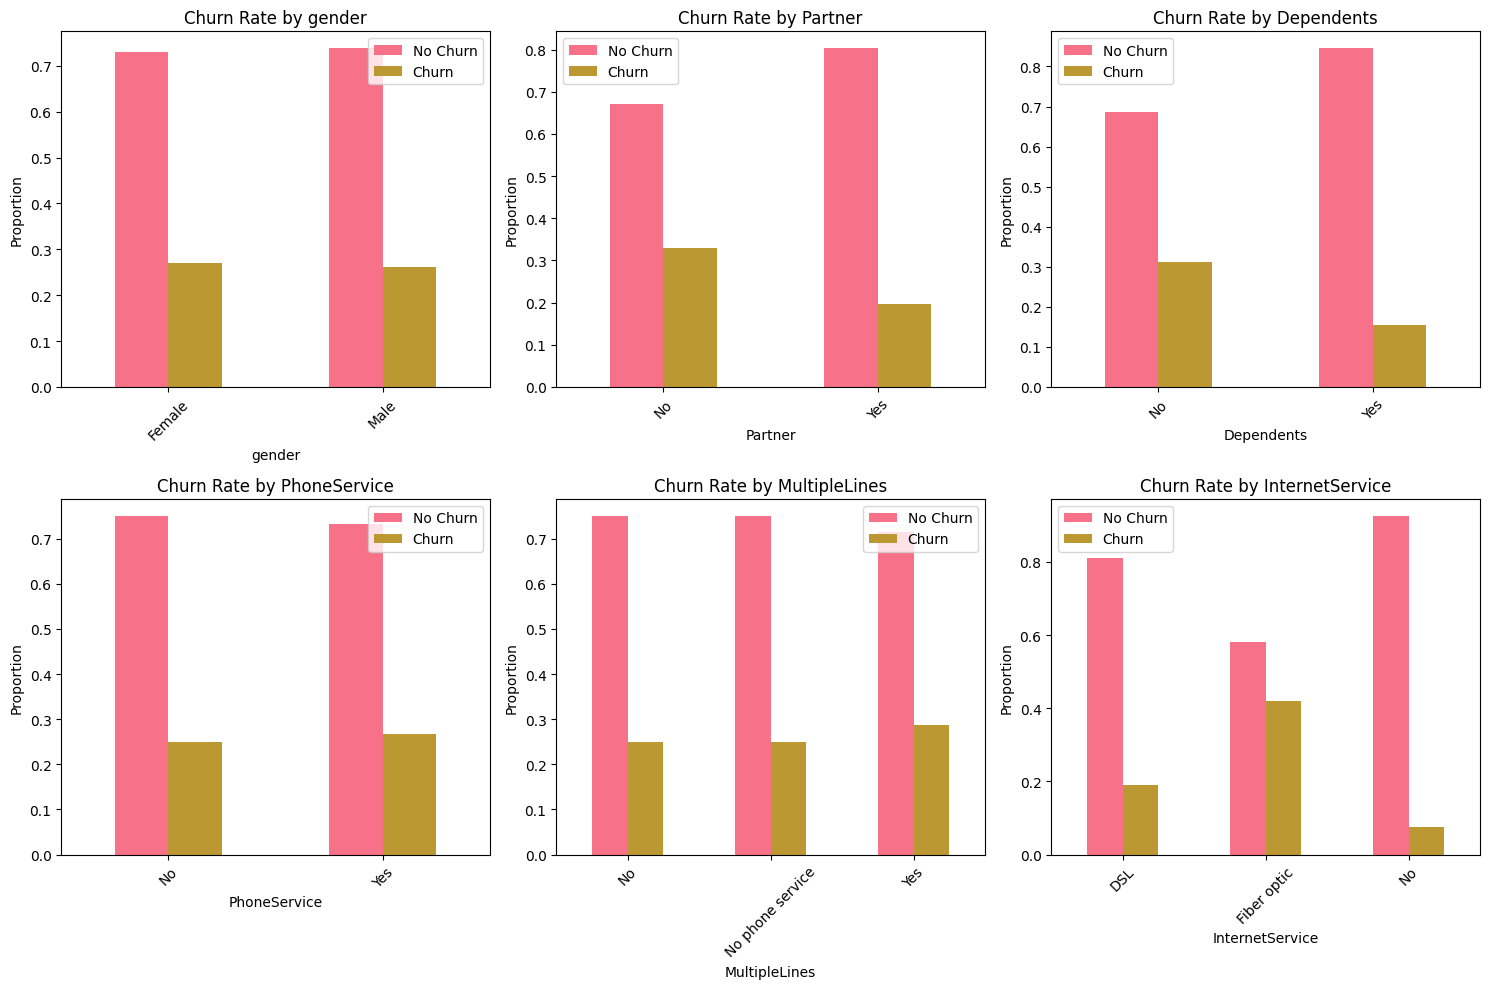

In [14]:
# Bivariate plots - Churn vs categorical features
categorical_subset = [col for col in categorical_cols if col != 'customerID'][:6]

fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.ravel()

for i, col in enumerate(categorical_subset):
    pd.crosstab(df[col], df['Churn'], normalize='index').plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Handle missing values and convert TotalCharges to numeric
df_processed = df.copy()

# Convert TotalCharges to numeric (handle spaces)
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median(), inplace=True)

print(f'Missing values after processing: {df_processed.isnull().sum().sum()}')

Missing values after processing: 0


In [18]:
# Encode categorical variables
le = LabelEncoder()

# Drop customerID as it's not useful for prediction
df_processed = df_processed.drop('customerID', axis=1)

# Encode all categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

print(f'Encoded columns: {list(categorical_cols)}')

Encoded columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [19]:
# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (7043, 19)
Target shape: (7043,)


In [20]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Test set: {X_test.shape[0]} samples')
print(f'Train churn rate: {y_train.mean():.3f}')
print(f'Test churn rate: {y_test.mean():.3f}')

Training set: 5634 samples
Test set: 1409 samples
Train churn rate: 0.265
Test churn rate: 0.265


In [21]:
# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Feature scaling completed')
print(f'Scaled training features shape: {X_train_scaled.shape}')
print(f'Scaled test features shape: {X_test_scaled.shape}')

Feature scaling completed
Scaled training features shape: (5634, 19)
Scaled test features shape: (1409, 19)


In [22]:
# Summary of preprocessing
print('=== PREPROCESSING SUMMARY ===')
print(f'Original dataset: {df.shape}')
print(f'Processed dataset: {df_processed.shape}')
print(f'Features after preprocessing: {X.shape[1]}')
print(f'Training samples: {X_train.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')
print('Data is ready for modeling!')

=== PREPROCESSING SUMMARY ===
Original dataset: (7043, 21)
Processed dataset: (7043, 20)
Features after preprocessing: 19
Training samples: 5634
Test samples: 1409
Data is ready for modeling!
